<b> <font size="6">А/В тестирование гипотез отд. маркетинга</font>  </b>

<b> <font size="4">Задача проекта:

* Приоритизация гипотез, выдвинутых аналитиком крупного интернет-магазина совместно с отделом маркетинга.
    
* Запуск A/B-тест и анализ его результатов.</font></b>


# ОГЛАВЛЕНИЕ


#  1. [Приоритизация гипотез:](#prior)
## 1.1. [Приоритизация гипотез с помошью фреймворка ICE по убыванию приоритета.](#prior_ice)
### 1.2. [Приоритизация гипотез с помошью фреймворка RICE по убыванию приоритета.](#prior_rice)
## 1.3. [Анализ изменений в приоритизация гипотез при применении RICE вместо ICE.](#comparision)
# 2. [Анализ A/B-теста:](#ab_analysis)

## 2.1. [Построение графика кумулятивной выручки по группам.](#2.1.)
### 2.1.1. [Выводы и предположения.](#2.1.1.)
## 2.2. [Построение графика кумулятивного среднего чека по группам.](#2.2.)
### 2.2.1. [Выводы и предположения.](#2.2.1.)
## 2.3. [Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.](#2.3.)
### 2.3.1. [Выводы и предположения.](#2.3.1.)
## 2.4. [Построение графика кумулятивной конверсии по группам.](#2.4.)
### 2.4.1. [Выводы и предположения.](#2.4.1.)
## 2.5. [Построение графика относительного изменения кумулятивной конверсии группы B к группе A.](#2.5.)
### 2.5.1. [Выводы и предположения.](#2.5.1.)
## 2.6. [Построение точечного графика количества заказов по пользователям.](#2.6.)
### 2.6.1. [Выводы и предположения.](#2.6.1.)
## 2.7. [Расчёт 95-й и 99-й перцентилей количества заказов на пользователя.](#2.7.)
### 2.7.1. [Выбор границы для определения аномальных пользователей.](#2.7.1.)
## 2.8. [Построение точечного графика стоимостей заказов.](#2.8.)
### 2.8.1. [Выводы и предположения.](#2.8.1.)
## 2.9. [Расчёт 95-й и 99-й перцентили стоимости заказов.](#2.9.)
### 2.9.1. [Выбор границы для определения аномальных заказов.](#2.9.1.)
## 2.10. [Расчёт статистической значимости различий в конверсии между группами по «сырым» данным.](#2.10.)
### 2.10.1. [Выводы и предположения.](#2.10.1.)
## 2.11. [Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.](#2.11.)
### 2.11.1. [Выводы и предположения.](#2.11.1.)
## 2.12. [Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным.](#2.12.)
### 2.12.1. [Выводы и предположения.](#2.12.1.)
## 2.13. [Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.](#2.13.)
### 2.13.1. [Выводы и предположения.](#2.13.1.)
## 2.14. [Принятие решения по результатам теста.](#2.14.)

<a class = "anchor" id = "prior"></a>
## 1. Приоритизация гипотез:

 <a class="anchor" id="prior_ice"></a>
### 1.1. Приоритизация гипотез по фреймворку ICE по убыванию приоритета.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st

hyp = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQJIF7Fgz54ig5tcy6Rri2XfvUKCVelv1CyYq65O24YKJvzsFDU6jrAgJ4dj9alzY6OcpXCzKnLQdpY/pub?gid=153294110&single=true&output=csv")
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [2]:
hyp['Priority_ICE'] = hyp.Impact*hyp.Confidence/hyp.Efforts
hyp['rank_ICE'] = hyp['Priority_ICE'].rank(ascending=False)
pd.set_option('display.max_colwidth',0)
display(hyp[['Hypothesis','Priority_ICE','rank_ICE']].sort_values(by = 'Priority_ICE', ascending = False).round())

,Hypothesis,Priority_ICE,rank_ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,1.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0,2.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0,3.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,5.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,6.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0,7.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0,8.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,9.0


`pd.set_option('display.max_colwidth', 0)`

 <a class="anchor" id="prior_rice"></a>
### 1.2. Приоритизация гипотез с помошью фреймворка RICE по убыванию приоритета.

In [3]:
hyp['Priority_RICE'] = hyp.Reach*hyp.Impact*hyp.Confidence/hyp.Efforts
hyp['rank_RICE'] = hyp['Priority_RICE'].rank(ascending=False)
display(hyp[['Hypothesis','Priority_RICE','rank_RICE']].sort_values(by = 'Priority_RICE', ascending = False).round())

,Hypothesis,Priority_RICE,rank_RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,1.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,2.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,4.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0,5.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,6.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,8.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,8.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,9.0


<a class = "anchor" id = "comparision"><a>
### 1.3. Анализ изменений в приоритизация гипотез при применении RICE вместо ICE.

In [4]:
display(hyp[['Hypothesis','rank_RICE','rank_ICE']].sort_values(by = 'rank_RICE', ascending = True).round())

,Hypothesis,rank_RICE,rank_ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",1.0,3.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",2.0,5.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",4.0,2.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",4.0,4.0
8,"Запустить акцию, дающую скидку на товар в день рождения",5.0,1.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",6.0,8.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",8.0,6.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",8.0,7.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",9.0,9.0


In [5]:
display('Гипотеза 8',hyp.loc[8]['Hypothesis'])

'Гипотеза 8'

'Запустить акцию, дающую скидку на товар в день рождения'

Из-за учёта дополнительного параметра REACH предполагаемого охвата изменений гипотеза #8 опустилась с 1-го ранга в ICE на 5-й в RICE, т.к. охват для каждого пользователя составляет лишь 1 день (или неделя если +-3 дня) в году.

In [6]:
display('Гипотеза 7',hyp.loc[7]['Hypothesis'])
display('Гипотеза 2',hyp.loc[2]['Hypothesis'])

'Гипотеза 7'

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

'Гипотеза 2'

'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'

С другой стороны 7-я и 2-я гипотезы поднялись с 3 и 5 рангов на 1 и 2 соответстенно.
Это произошло, т.к. изменения коснутся практически всех поситителей сайта.

Т.о. важно учитывать масштаб охвата изменений при анализе приоритета гипотез для A/B тестирования. 

<a class = "anchor" id = "ab_analysis"></a>
## 2. Анализ A/B-теста

### Загрузка данных и проверка на дубликаты

In [7]:
orders = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTaONXG36RWJl6-9p6hJEkg00hTgg-C0j0icYvQ0eq3n95cRM2oNEG2BuRZiY0c6PHq4zUAHhFRFb5b/pub?gid=728664543&single=true&output=csv')
visitors = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTbuHmCWnsqenCO-vX9fgfR0ZlotPaLKbCzWYKs_x_5RE0vEMyuTxoaNEkNJai8oVqGQCo2mJCmRpu_/pub?gid=198389916&single=true&output=csv')

display('orders: ',orders.head(5))
print(orders.info())
orders['date'] = orders['date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
display('Дубликатов в orders: ', orders.duplicated().sum())

display('visitors: ', visitors.head(5))
print(visitors.info())
visitors['date'] = visitors['date'].apply(lambda x: dt.strptime(x, '%Y-%m-%d'))
display('Дубликатов в visitors: ', visitors.duplicated().sum())

'orders: '

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


'Дубликатов в orders: '

0

'visitors: '

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


'Дубликатов в visitors: '

0

In [8]:
print(f"Уникальных позьзователей в orders: {orders['visitorId'].nunique()}")
print(f"Общее число заказов: {orders['transactionId'].nunique()}")
print()
usersA = orders[orders['group'] == 'A']
usersB = orders[orders['group'] == 'B']

print(f"Пользователей в группе A: {usersA['visitorId'].nunique()}")
print(f"Заказов пользователей группы A: {usersA['transactionId'].nunique()}")
print()
print(f"Пользователей в группе B: {usersB['visitorId'].nunique()}")
print(f"Заказов пользователей группы B: {usersB['transactionId'].nunique()}")
print()
print(f"Пересечение заказов пользователей в группах: \n {usersA['visitorId'].isin(usersB['visitorId']).sum()} заказов присутствуют в группах А и В. ")
usersA_B = usersA[usersA['visitorId'].isin(usersB['visitorId'])]['visitorId']
print(f"Число пользователей с заказами, попавшими в обе группы: {orders[orders['visitorId'].isin(usersA_B)]['visitorId'].nunique()}")
print()
print(f"Заказов пересекающихся пользователей в группах: \n {usersA['visitorId'].isin(usersB['visitorId']).sum()}, что составляет {usersA['visitorId'].isin(usersB['visitorId']).sum()/orders['transactionId'].nunique():.2%} всех заказов")
print(f"Сумма заказов пересекающихся пользователей в группах: \n {orders[orders['visitorId'].isin(usersA_B)]['revenue'].sum()}, что составляет {orders[orders['visitorId'].isin(usersA_B)]['revenue'].sum()/orders['revenue'].sum():.2%} всех заказов")

orders_clear = orders[~(orders['visitorId'].isin(usersA_B))]

orders[orders['visitorId'].isin(usersA_B)].sort_values('visitorId')

Уникальных позьзователей в orders: 1031
Общее число заказов: 1197

Пользователей в группе A: 503
Заказов пользователей группы A: 557

Пользователей в группе B: 586
Заказов пользователей группы B: 640

Пересечение заказов пользователей в группах: 
 89 заказов присутствуют в группах А и В. 
Число пользователей с заказами, попавшими в обе группы: 58

Заказов пересекающихся пользователей в группах: 
 89, что составляет 7.44% всех заказов
Сумма заказов пересекающихся пользователей в группах: 
 1558935, что составляет 15.60% всех заказов


,transactionId,visitorId,date,revenue,group
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
823,2971973105,199603092,2019-08-27,2790,A
246,437656952,199603092,2019-08-02,3488,B
26,2223239646,199603092,2019-08-15,3488,A
...,...,...,...,...,...
187,2048878902,4256040402,2019-08-17,1550,A
114,1120327437,4256040402,2019-08-01,5800,A
60,1421016313,4256040402,2019-08-16,56650,B
662,1811671147,4266935830,2019-08-29,78990,A


In [9]:
print('Данные по очищенныму датафрейму:')
print(f"Уникальных позьзователей в orders: {orders_clear['visitorId'].nunique()}")
print(f"Общее число заказов: {orders_clear['transactionId'].nunique()}")
print()
usersA_clear = orders_clear[orders_clear['group'] == 'A']
usersB_clear = orders_clear[orders_clear['group'] == 'B']

print(f"Пользователей в группе A: {usersA_clear['visitorId'].nunique()}")
print(f"Заказов пользователей группы A: {usersA_clear['transactionId'].nunique()}")
print()
print(f"Пользователей в группе B: {usersB_clear['visitorId'].nunique()}")
print(f"Заказов пользователей группы B: {usersB_clear['transactionId'].nunique()}")
print()
print(f"Пересечение пользователей в группах: \n {usersA_clear['visitorId'].isin(usersB_clear['visitorId']).sum()} visitorId присутствуют в группах А и В. ")

Данные по очищенныму датафрейму:
Уникальных позьзователей в orders: 973
Общее число заказов: 1016

Пользователей в группе A: 445
Заказов пользователей группы A: 468

Пользователей в группе B: 528
Заказов пользователей группы B: 548

Пересечение пользователей в группах: 
 0 visitorId присутствуют в группах А и В. 


Анализ данных основанных на пересечении в заказах групп А и В будет некорректным.
Поэтому данные о заказах пользователей, чьи заказы попали в обе группы, удалены.
Однако теперь лучше было бы отфильтровать данные о посетителях и не учитывать посещения от этих пользователей.
В противном случае данные по конверсии будут несколько занижены.

<a class = "anchor" id = "2.1."></a>
## 2.1. Построение графика кумулятивной выручки по группам.

Группировка выручки, количества пользователей и заказов разных групп по датам

In [10]:
ordersByDateA = orders_clear[orders_clear['group'] == "A"].groupby(['date'],as_index = False).agg({'date':'max', 'group':'max','revenue':'sum','transactionId':pd.Series.nunique})
ordersByDateA.columns = ['date', 'group','revenueByDateA','ordersByDateA']

ordersByDateB = orders_clear[orders_clear['group'] == "B"].groupby(['date'],as_index = False).agg({'date':'max', 'group':'max','revenue':'sum','transactionId':pd.Series.nunique})
ordersByDateB.columns = ['date', 'group','revenueByDateB','ordersByDateB']

print(ordersByDateA.head())
print(ordersByDateB.head())

        date group  revenueByDateA  ordersByDateA
0 2019-08-01  A     142779          23           
1 2019-08-02  A     91602           19           
2 2019-08-03  A     112473          24           
3 2019-08-04  A     41176           11           
4 2019-08-05  A     86383           22           
        date group  revenueByDateB  ordersByDateB
0 2019-08-01  B     59758           17           
1 2019-08-02  B     162043          23           
2 2019-08-03  B     67049           14           
3 2019-08-04  B     96890           14           
4 2019-08-05  B     89908           21           


### Создание датафреймов с кумулятивными данными

In [11]:
ordersCumulativeA = ordersByDateA.apply(lambda x: ordersByDateA[ordersByDateA['date']<=x['date']].agg({'date':'max','ordersByDateA':'sum','revenueByDateA':'sum'}),axis=1).sort_values(by = 'date')
ordersCumulativeB = ordersByDateB.apply(lambda x: ordersByDateB[ordersByDateB['date']<=x['date']].agg({'date':'max','ordersByDateB':'sum','revenueByDateB':'sum'}),axis=1).sort_values(by = 'date')

data_cumul = ordersCumulativeA.merge(ordersCumulativeB, on = 'date')

print(data_cumul)

         date  ordersByDateA  revenueByDateA  ordersByDateB  revenueByDateB
0  2019-08-01  23             142779          17             59758         
1  2019-08-02  42             234381          40             221801        
2  2019-08-03  66             346854          54             288850        
3  2019-08-04  77             388030          68             385740        
4  2019-08-05  99             474413          89             475648        
5  2019-08-06  114            515332          112            690490        
6  2019-08-07  130            638580          135            909654        
7  2019-08-08  144            727219          157            1059795       
8  2019-08-09  155            861456          176            1162961       
9  2019-08-10  170            1013731         198            1268123       
10 2019-08-11  181            1074396         210            1321183       
11 2019-08-12  200            1294788         229            1425237       
12 2019-08-1

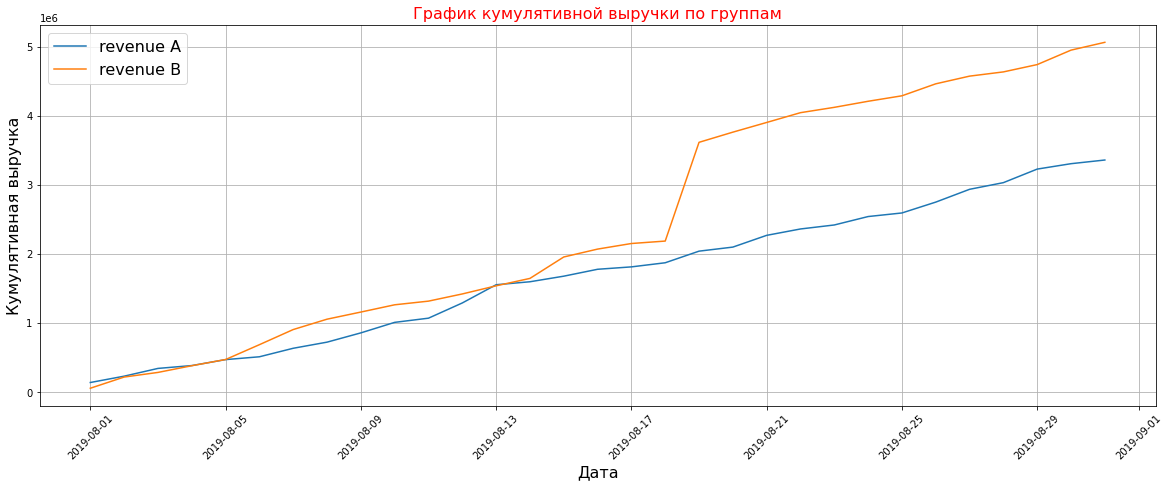

In [12]:
plt.figure(figsize=(20,7))
plt.plot(data_cumul['date'],data_cumul['revenueByDateA'], label = 'revenue A')
plt.plot(data_cumul['date'],data_cumul['revenueByDateB'], label = 'revenue B')
plt.xticks(rotation = 45)
plt.title('График кумулятивной выручки по группам', size = 16, color = 'r')
plt.xlabel('Дата',size = 16)
plt.ylabel('Кумулятивная выручка',size = 16)
plt.legend(prop={'size': 16})
plt.grid()
plt.show()

 <a class="anchor" id="2.1.1."></a>
### 2.1.1. Выводы и предположения.

Судя по графику, в группе И 18.08 произошла разовая крупная покупка из-за чего REVENUE группы B стало значительно выше, чем A.

 <a class="anchor" id="2.2."></a>
### 2.2. Построение графика кумулятивного среднего чека по группам.

In [13]:
data_cumul['checkCumulativeA'] = data_cumul['revenueByDateA'] / data_cumul['ordersByDateA']
data_cumul['checkCumulativeB'] = data_cumul['revenueByDateB'] / data_cumul['ordersByDateB']

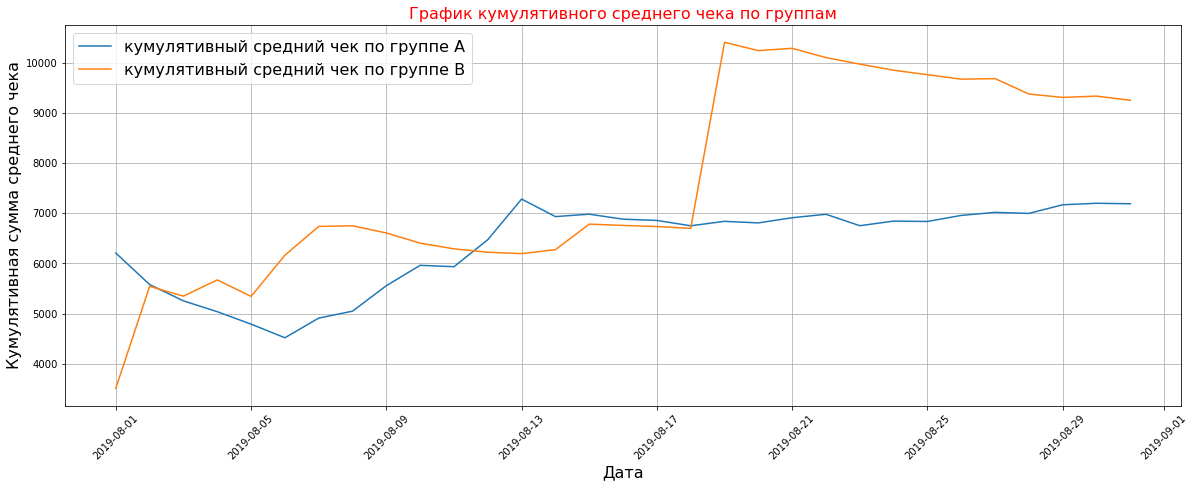

In [14]:
plt.figure(figsize=(20,7))
plt.plot(data_cumul['date'],data_cumul['checkCumulativeA'], label = 'кумулятивный средний чек по группе A')
plt.plot(data_cumul['date'],data_cumul['checkCumulativeB'], label = 'кумулятивный средний чек по группе B')
plt.xticks(rotation = 45)

plt.title('График кумулятивного среднего чека по группам', size = 16, color = 'r')
plt.xlabel('Дата',size = 16)
plt.ylabel('Кумулятивная сумма среднего чека',size = 16)

plt.legend(prop={'size': 16})
plt.grid()
plt.show()

 <a class="anchor" id="2.2.1."></a>
### 2.2.1. Выводы и предположения.

Средний чек в группах выравнивается возле примерно равных значений к 18.08. После этого наблюдается резкий скачок в группе B и дальнейшее снижение среднего чека в группе B и небольшое увеличение значения в группе A.
Это говорит о разовом увеличении среднего чека в группе B и дальнейшем выравнивании показателей к единому значению.

<a class="anchor" id="2.3."></a>
### 2.3. График относительного изменения кумулятивного среднего чека группы B к группе A.

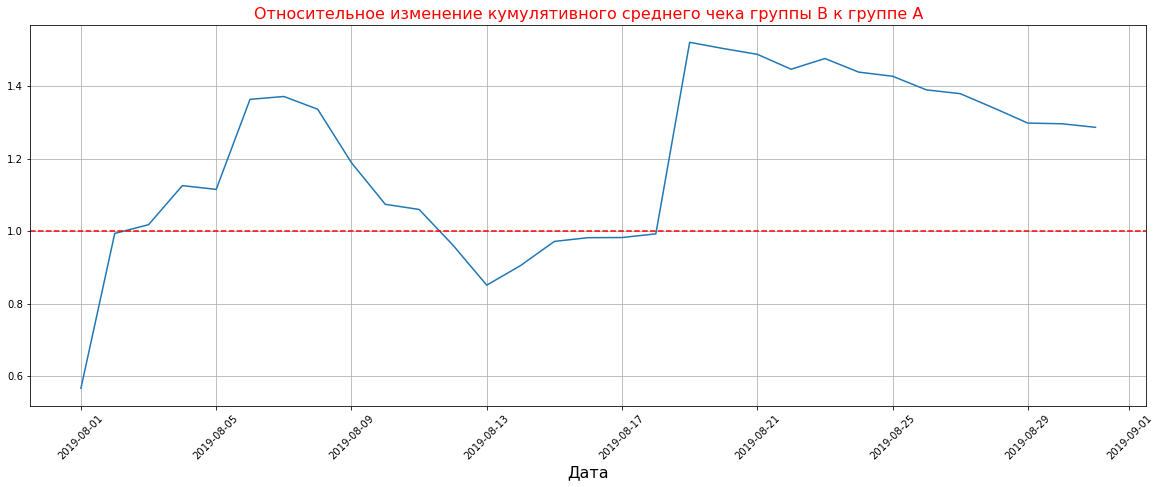

In [15]:
plt.figure(figsize=(20,7))
plt.plot(data_cumul['date'],data_cumul['checkCumulativeB']/data_cumul['checkCumulativeA'])
plt.xticks(rotation = 45)

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', size = 16, color = 'r')
plt.xlabel('Дата',size = 16)

plt.axhline(1, linestyle ="--", color = 'r')
plt.grid()
plt.show()

 <a class="anchor" id="2.3.1."></a>
#### 2.3.1. Выводы и предположения.

Отношение кумулятивнх средних чеков B/A к 18.08 еще не стабилизоровалось к определённому значению, нельзя однозначно определить лучшую группу.

 <a class="anchor" id="2.4."></a>
### 2.4. Построение графика кумулятивной конверсии по группам.

In [16]:
visitorsByDateA = visitors[visitors['group'] == 'A'].groupby('date',as_index = False).agg({'visitors': 'sum'})
visitorsByDateB = visitors[visitors['group'] == 'B'].groupby('date',as_index = False).agg({'visitors': 'sum'})
visitorsByDateA.columns = ['date','visitorsByDateA']
visitorsByDateB.columns = ['date','visitorsByDateB']

visitorsCumulativeA = visitorsByDateA.apply(lambda x: visitorsByDateA[visitorsByDateA['date']<=x['date']].agg({'date':'max','visitorsByDateA':'sum'}),axis=1).sort_values(by = 'date')
visitorsCumulativeB = visitorsByDateB.apply(lambda x: visitorsByDateB[visitorsByDateB['date']<=x['date']].agg({'date':'max','visitorsByDateB':'sum'}),axis=1).sort_values(by = 'date')

print(visitorsCumulativeA.head())
print(visitorsCumulativeB.head())

        date  visitorsByDateA
0 2019-08-01  719            
1 2019-08-02  1338           
2 2019-08-03  1845           
3 2019-08-04  2562           
4 2019-08-05  3318           
        date  visitorsByDateB
0 2019-08-01  713            
1 2019-08-02  1294           
2 2019-08-03  1803           
3 2019-08-04  2573           
4 2019-08-05  3280           


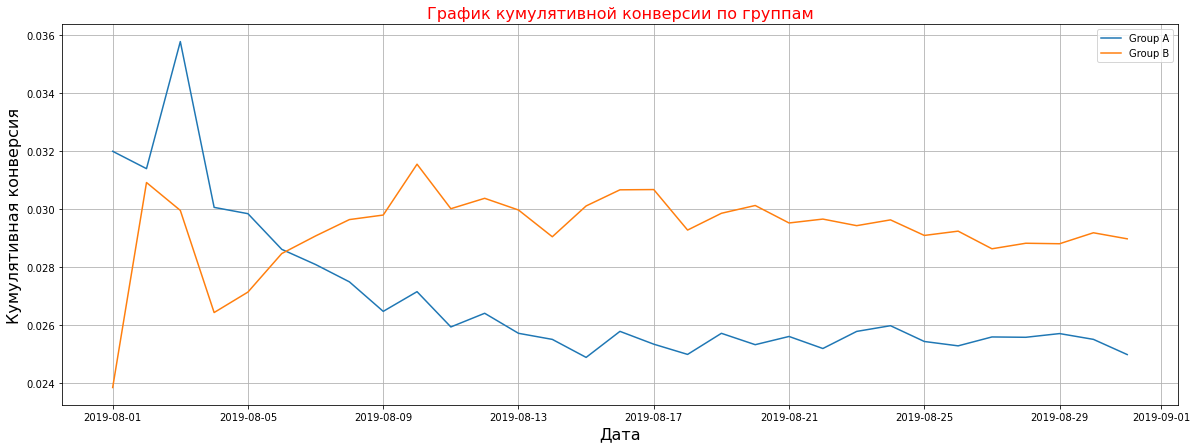

In [17]:
plt.figure(figsize=(20,7))
plt.plot(ordersCumulativeB['date'],ordersCumulativeA['ordersByDateA']/visitorsCumulativeA['visitorsByDateA'],label = 'Group A')
plt.plot(ordersCumulativeB['date'],ordersCumulativeB['ordersByDateB']/visitorsCumulativeB['visitorsByDateB'],label = 'Group B')

plt.title('График кумулятивной конверсии по группам', size = 16, color = 'r')
plt.xlabel('Дата',size = 16)
plt.ylabel('Кумулятивная конверсия',size = 16)

plt.grid()
plt.legend()

<a class="anchor" id="2.4.1."></a>
#### 2.4.1. Выводы и предположения.

Уже после 10.08 конверсия начинает стабилизироваться, при этом конверсия группы В (2.9%) стабильно выше конверсии группы А (2.6%).

 <a class="anchor" id="2.5."></a>
### 2.5. Построение графика относительного изменения кумулятивной конверсии группы B к группе A.

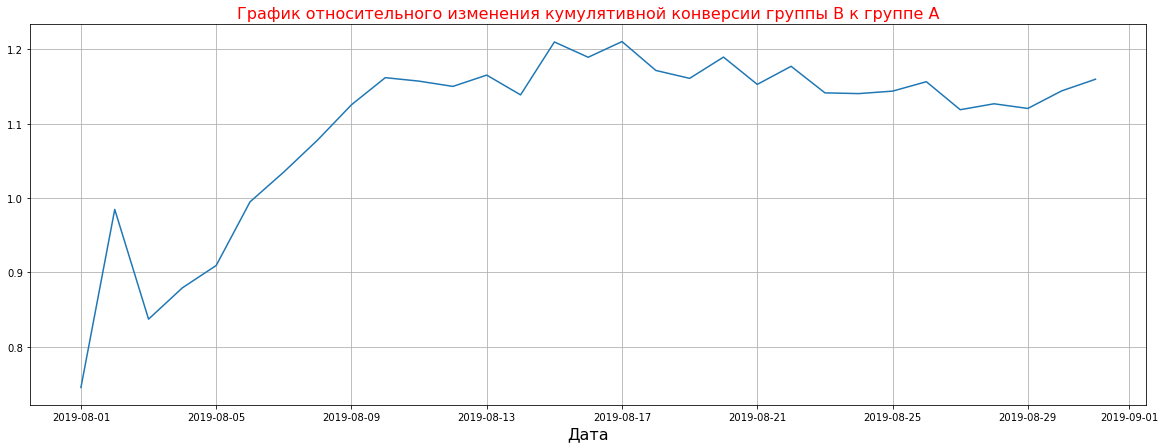

In [18]:
plt.figure(figsize=(20,7))
plt.plot(ordersCumulativeB['date'],(ordersCumulativeB['ordersByDateB']/visitorsCumulativeB['visitorsByDateB'])/(ordersCumulativeA['ordersByDateA']/visitorsCumulativeA['visitorsByDateA']))

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size = 16, color = 'r')
plt.xlabel('Дата', size = 16)

plt.grid()
plt.show()

 <a class="anchor" id="2.5.1."></a>
#### 2.5.1. Выводы и предположения

После 10.08 конверсия группы B держится на 10-15% выше конверсии группы А.

 <a class="anchor" id="2.6."></a>
### 2.6.  Построение точечного графика количества заказов по пользователям.

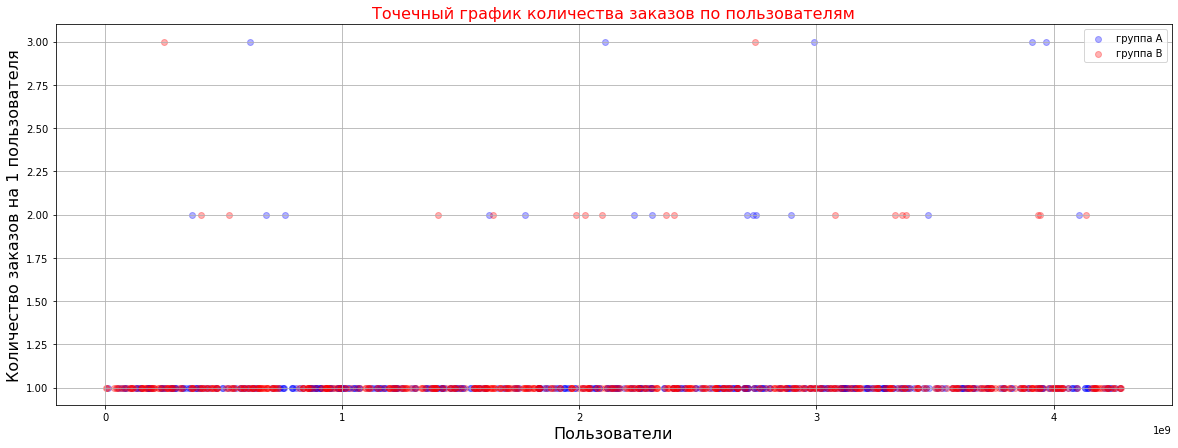

In [19]:
ordersByUsersA = orders_clear[orders_clear['group'] == "A"].groupby(['visitorId'],as_index = False).agg({'transactionId':pd.Series.nunique})
ordersByUsersA.columns = ['visitorId','orders']
ordersByUsersB = orders_clear[orders_clear['group'] == "B"].groupby(['visitorId'],as_index = False).agg({'transactionId':pd.Series.nunique})
ordersByUsersB.columns = ['visitorId','orders']

plt.figure(figsize=(20,7))
plt.scatter(ordersByUsersA['visitorId'],ordersByUsersA['orders'], alpha = 0.3,color = 'b',label = 'группа A')
plt.scatter(ordersByUsersB['visitorId'],ordersByUsersB['orders'], alpha = 0.3,color = 'r',label = 'группа B')
plt.legend()

plt.title('Точечный график количества заказов по пользователям', size = 16, color = 'r')
plt.xlabel('Пользователи',size = 16)
plt.ylabel('Количество заказов на 1 пользователя',size = 16)

plt.grid()
plt.show()

 <a class="anchor" id="2.6.1."></a>
#### 2.6.1. Выводы и предположения

Большая часть пользователей сделали по 1-2 заказа, пользователи с заказами 3 - единичные.

 <a class="anchor" id="2.7."></a>
### 2.7.  Расчёт 95-й и 99-й перцентилей количества заказов на пользователя

In [20]:
ordersByUsers = orders_clear.groupby(['visitorId'],as_index = False).agg({'transactionId':pd.Series.nunique})
ordersByUsers.columns = ['visitorId','number_of_orders']
print(np.percentile(ordersByUsers['number_of_orders'], [95, 99])) 

[1. 2.]


 <a class="anchor" id="2.7.1."></a>
#### 2.7.1. Выбор границы для определения аномальных пользователей.

In [21]:
ord_count_limit = np.percentile(ordersByUsers['number_of_orders'], [95, 99])[1]

В 95% пользователей количество заказов не превышает 1го, у 99% - 2х.
За аномальных пользователей примем тех, у кого количество заказов более 2х, т.о. мы отсечем не более 1% выборки

 <a class="anchor" id="2.8."></a>
### 2.8.  Построение точечного графика стоимостей заказов.

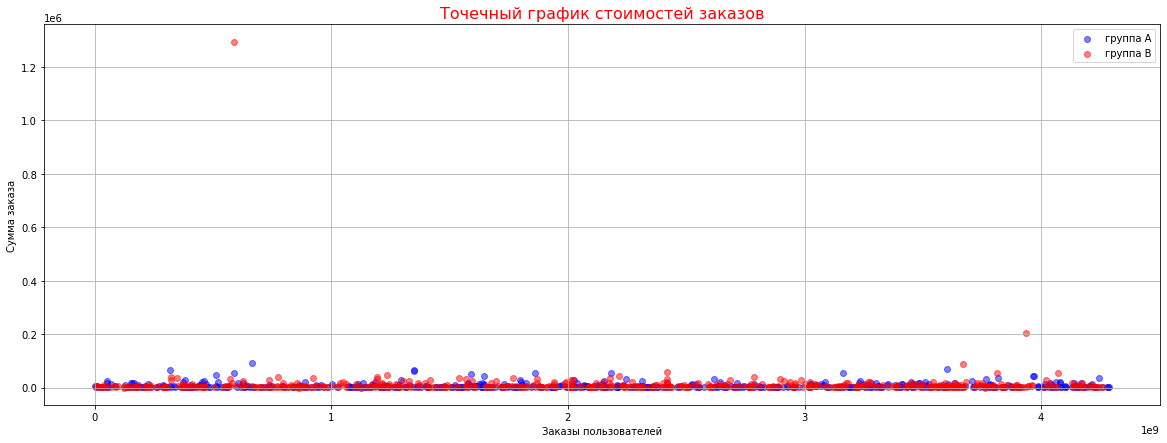

In [22]:
revenueByOrdersA = orders_clear[orders_clear['group'] == "A"].groupby(['transactionId'],as_index = False).agg({'revenue':'sum'})
revenueByOrdersB = orders_clear[orders_clear['group'] == "B"].groupby(['transactionId'],as_index = False).agg({'revenue':'sum'})

plt.figure(figsize=(20,7))
plt.scatter(revenueByOrdersA['transactionId'],revenueByOrdersA['revenue'], alpha = 0.5,color = 'b',label = 'группа A')
plt.scatter(revenueByOrdersB['transactionId'],revenueByOrdersB['revenue'], alpha = 0.5,color = 'r',label = 'группа B')
plt.legend()
plt.title('Точечный график стоимостей заказов', size = 16, color = 'r')
plt.xlabel('Заказы пользователей')
plt.ylabel('Сумма заказа')
plt.grid()
plt.show()

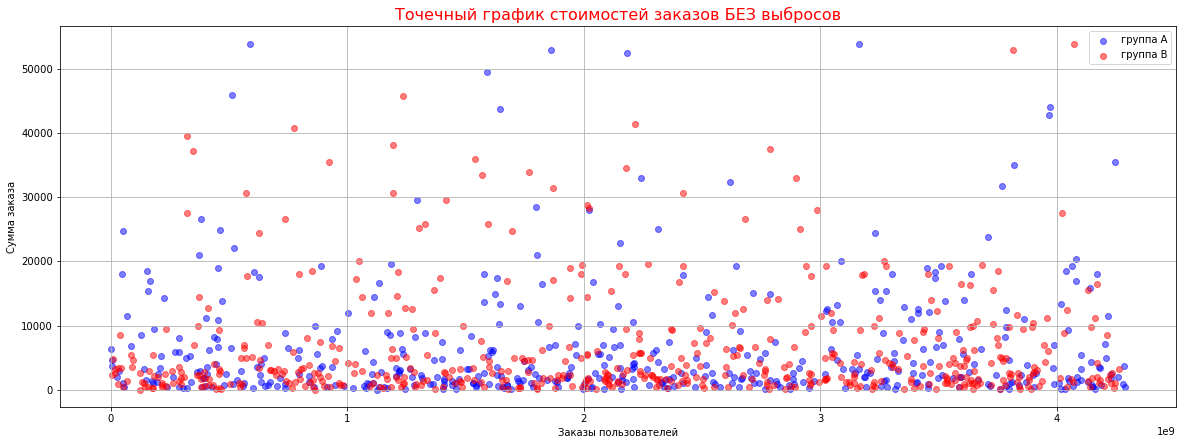

In [23]:
revenueByOrdersA = orders_clear[np.logical_and(orders_clear['group'] == "A",orders_clear['revenue']<=58233)].groupby(['transactionId'],as_index = False).agg({'revenue':'sum'})
revenueByOrdersB = orders_clear[np.logical_and(orders_clear['group'] == "B",orders_clear['revenue']<=58233)].groupby(['transactionId'],as_index = False).agg({'revenue':'sum'})

plt.figure(figsize=(20,7))
plt.scatter(revenueByOrdersA['transactionId'],revenueByOrdersA['revenue'], alpha = 0.5,color = 'b',label = 'группа A')
plt.scatter(revenueByOrdersB['transactionId'],revenueByOrdersB['revenue'], alpha = 0.5,color = 'r',label = 'группа B')
plt.legend()
plt.title('Точечный график стоимостей заказов БЕЗ выбросов', size = 16, color = 'r')
plt.xlabel('Заказы пользователей')
plt.ylabel('Сумма заказа')
plt.grid()
plt.show()

 <a class="anchor" id="2.8.1."></a>
#### 2.8.1. Выводы и предположения

В стоимости заказов группы В видны явные выбросы: заказ на 1.3 млн и на 200 тыс. Остальные заказы не превышают 60 тыс.

 <a class="anchor" id="2.9."></a>
### 2.9.   Расчёт 95-й и 99-й перцентили стоимости заказов.


In [24]:
revenueByOrders = orders_clear.groupby(['transactionId'],as_index = False).agg({'revenue':'sum'})

print(np.percentile(revenueByOrders['revenue'], [95, 99]))

[26785. 53904.]


 <a class="anchor" id="2.9.1."></a>
#### 2.9.1. Выбор границы для определения аномальных заказов.

In [25]:
revenue_limit = np.percentile(revenueByOrders['revenue'], [95, 99])[1]

В 95% заказов сумма заказа не превышает 27 тыс., в 99% не превышает 54 тыс.
За аномальных пользователей примем заказы суммой более 54000, т.о. мы отсечем не более 1% выборки

 <a class="anchor" id="2.10."></a>
### 2.10.    Расчёт статистической значимости различий в конверсии между группами по «сырым» данным.
 

Проверим различаются ли конверсии в группах А и В.

H0: конверсии в обеих группах не различаются.

H1: конверсии различны в группах A и B.

In [26]:
convA = orders[orders['group'] == 'A']['visitorId'].nunique()/visitors[visitors['group'] == 'A']['visitors'].sum()
convB = orders[orders['group'] == 'B']['visitorId'].nunique()/visitors[visitors['group'] == 'B']['visitors'].sum()

In [27]:
alpha = .05 # критический уровень статистической значимости

ordersNum = np.array([orders[orders['group'] == 'A']['visitorId'].nunique(), orders[orders['group'] == 'B']['visitorId'].nunique()])
visitorsNum = np.array([visitors[visitors['group'] == 'A']['visitors'].sum(), visitors[visitors['group'] == 'B']['visitors'].sum()])

# пропорция успехов в первой группе:
p1 = ordersNum[0]/visitorsNum[0]

# пропорция успехов во второй группе:
p2 = ordersNum[1]/visitorsNum[1]

# пропорция успехов в комбинированном датасете:
p_combined = (ordersNum[0] + ordersNum[1]) / (visitorsNum[0] + visitorsNum[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitorsNum[0] + 1/visitorsNum[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2


print(f'Конверсия группы А: {convA:.2%}')
print(f'Конверсия группы B: {convB:.2%}')
print(f'Конверсия группы B больше А на {convB/convA - 1:.2%}')

print(f'p-значение: {p_value:.5f}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными'
    ) 

Конверсия группы А: 2.68%
Конверсия группы B: 3.10%
Конверсия группы B больше А на 15.39%
p-значение: 0.01674
Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


<a class="anchor" id="2.10.1."></a>
#### 2.10.1. Выводы и предположения.

Не подтвержилась нулевая гипотеза.

Конверсии групп A и B отличаются. 

В группе В конверсия выше, различие в конверсиях между группами статистически значимо

 <a class="anchor" id="2.11."></a>
### 2.11. Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Проверим различаются ли суммы среднего чека в группах А и В.

H0: средние чеки в обеих группах не различаются.

H1: средние чеки различны в группах А и В.

In [28]:
revenueA = orders_clear[orders_clear['group'] == 'A']['revenue']
revenueB = orders_clear[orders_clear['group'] == 'B']['revenue']

In [29]:
alpha = 0.05
print(f'Средний чек группы А: {revenueA.mean():.2f}')
print(f'Средний чек группы B: {revenueB.mean():.2f}')
print(f'% превышения среднего чека группы B над группой А: {revenueB.mean()/revenueA.mean()-1:.2%}')
print()
resultsMW = st.mannwhitneyu(revenueA, revenueB)
print(f'p-значение теста Манна-Уитни: {resultsMW.pvalue:.5f}')

if (resultsMW.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница средних чеков групп А и В статистически значима")
else:
        print("Не получилось отвергнуть нулевую гипотезу, вывод о различии по тесту Манна-Уитни сделать нельзя")

Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
% превышения среднего чека группы B над группой А: 28.66%

p-значение теста Манна-Уитни: 0.82949
Не получилось отвергнуть нулевую гипотезу, вывод о различии по тесту Манна-Уитни сделать нельзя


<a class="anchor" id="2.11.1."></a>
#### 2.11.1. Выводы и предположения.

Подтвердилась нулевая гипотеза.

По результатам тестов средний чек в группах А и В не отличается. 

Однако средний чек В больше чем А на 25%! Вероятно из-за наличия больших выбросов в выборке.

 <a class="anchor" id="2.12."></a>
### 2.12. Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным.

Найдём пользователей среди которых есть данные с выбросами по кол-ву и суммами заказов.

Запишем данные о таких пользователях в таблицу `abnormalUsers`

In [30]:
# пользователи с количеством заказов, большим ord_count_limit
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ord_count_limit]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > ord_count_limit]['visitorId'],
    ],
    axis=0,
)
# пользователи с суммами заказов, большим revenue_limit
usersWithExpensiveOrders = orders_clear[orders_clear['revenue'] > revenue_limit]['visitorId']
# Список аномальных visitorId
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(abnormalUsers)

print(len(abnormalUsers),'пользователей с выбросами по кол-ву и суммами заказов')

1099    148427295 
33      249864742 
58      611059232 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
Name: visitorId, dtype: int64
16 пользователей с выбросами по кол-ву и суммами заказов


In [31]:
convA_cleared = orders_clear[np.logical_and(orders_clear['group'] == 'A',np.logical_not(orders_clear['visitorId'].isin(abnormalUsers)))]['visitorId'].nunique()/visitors[visitors['group'] == 'A']['visitors'].sum()
convB_cleared = orders_clear[np.logical_and(orders_clear['group'] == 'B',np.logical_not(orders_clear['visitorId'].isin(abnormalUsers)))]['visitorId'].nunique()/visitors[visitors['group'] == 'B']['visitors'].sum()

Проверим различаются ли конверсии по данным, очищенным от выбросов в группах А и В.

H0: конверсии в обеих группах не различаются.

H1: конверсии группах различны.

In [32]:
alpha = .05 # критический уровень статистической значимости

ordersNum_cleared = np.array(
    [
        orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers))
            )]['visitorId'].nunique(),
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers))
            )]['visitorId'].nunique()
    ]
)

# пропорция успехов в первой группе:
p1 = ordersNum_cleared[0]/visitorsNum[0]

# пропорция успехов во второй группе:
p2 = ordersNum_cleared[1]/visitorsNum[1]

# пропорция успехов в комбинированном датасете:
p_combined = (ordersNum_cleared[0] + ordersNum_cleared[1]) / (visitorsNum[0] + visitorsNum[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/visitorsNum[0] + 1/visitorsNum[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2


print(f'Конверсия группы А: {convA_cleared:.2%}')
print(f'Конверсия группы B: {convB_cleared:.2%}')
print(f'Конверсия группы B больше А на {convB_cleared/convA_cleared - 1:.2%}')


print(f'p-значение: {p_value:.5f}')

if p_value < alpha:
    print('\nОтвергаем нулевую гипотезу: между конверсиями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать конверсии разными'
    ) 

Конверсия группы А: 2.32%
Конверсия группы B: 2.76%
Конверсия группы B больше А на 18.86%
p-значение: 0.01122

Отвергаем нулевую гипотезу: между конверсиями есть значимая разница


<a class="anchor" id="2.12.1."></a>
#### 2.12.1. Выводы и предположения.

Конверсия "очищенных" данных несколько снизилась, однако разница в конверсии осталась статистически значима, а размер различия даже вырос.

 <a class="anchor" id="2.13."></a>
### 2.13. Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

Проверим различаются ли средние чеки по данным, очищенным от выбросов в группах А и В.

H0: средние чеки в обеих группах не различаются.

H1: средние чеки в группах различны.

In [33]:
alpha = .05

revenueA_c = orders_clear[np.logical_and(orders_clear['group'] == 'A',np.logical_not(orders_clear['visitorId'].isin(abnormalUsers)))]['revenue']
revenueB_c = orders_clear[np.logical_and(orders_clear['group'] == 'B',np.logical_not(orders_clear['visitorId'].isin(abnormalUsers)))]['revenue']

print(f'Средний чек группы А по очищенным данным: {revenueA_c.mean():.2f}')
print(f'Средний чек группы B по очищенным данным: {revenueB_c.mean():.2f}')
print(f'% превышения среднего чека группы B над группой А: {revenueB_c.mean()/revenueA_c.mean()-1:.2%}')
print()

resultsMW = st.mannwhitneyu(revenueA_c,revenueB_c)
print(f'p-значение теста Манна-Уитни: {resultsMW.pvalue:.5f}')

if (resultsMW.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии средних чеков по тесту Манна-Уитни сделать нельзя")

Средний чек группы А по очищенным данным: 6487.02
Средний чек группы B по очищенным данным: 6277.27
% превышения среднего чека группы B над группой А: -3.23%

p-значение теста Манна-Уитни: 0.78770
Не получилось отвергнуть нулевую гипотезу, вывод о различии средних чеков по тесту Манна-Уитни сделать нельзя


<a class="anchor" id="2.13.1."></a>
#### 2.13.1. Выводы и предположения.

После очистки от выбросов разница между средними чеками групп А и В составляет 3% и эта разница не является статистически значимой.

<a class="anchor" id="2.14."></a>
### 2.14. Решение по результатам теста.

Тестирование показало, что:
* Статистически значимая разница в средних чеках между разными группами отсутствует
* Подтверждено наличие статистически значимой разницы в конверсиях - группа В показывает на 19% большую конверсию
* Анализ кумулятивной конверсии позволяет считать конверсию стабилизировавшейся.

Т.о. рекомендуется остановить тест и зафиксировать победу группы В с показателем конверсии на 19% больше, чем у группы А.